In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../bk/data/ioperf.csv')
df['bandwidth'] /= 1000
df.sort_values(by='bandwidth', inplace=True)

In [2]:
df[['block_size', 'total_size']].sort_values(by='total_size')

,block_size,total_size
51,2097152.0,1.073742e+09
54,16777216.0,1.073742e+09
53,8388608.0,1.073742e+09
50,1048576.0,1.073742e+09
48,262144.0,1.073742e+09
...,...,...
202,524288.0,1.374390e+11
278,268435456.0,1.374390e+11
277,134217728.0,1.374390e+11
455,268435456.0,1.374390e+11


In [3]:
# block_sizes = 128 * np.random.choice(range(5000), 500, replace=False) * 1024
# block_sizes, len(block_sizes)

In [4]:
def train_rf(X, y, iomode):
    # scaler = MinMaxScaler()
    # X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(X_train.shape)
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    rf_regressor.fit(X_train, y_train)

    if iomode == 0:
        model_name = "../models/rf_local.pkl"
    else:
        model_name = "../models/rf_remote.pkl"
    with open(model_name, 'wb') as f:
        pkl.dump(rf_regressor, f)

    with open(model_name, 'rb') as f:
        rf_regressor = pkl.load(f)
    y_pred = rf_regressor.predict(X_test)

    pe = 100 * (abs(y_pred - y_test) / y_test)
    sns.distplot(pe.values, hist = True, kde = True, bins=100,
                hist_kws={'cumulative':True,'density':True, 'alpha':0.3},
                kde_kws={'cumulative':True,'color': 'red', 'lw': 2})

    sns.set_style('whitegrid')
    plt.xlabel('Prediction Error(%)')
    plt.show()
    
    x = np.arange(len(y_pred))
    plt.scatter(x, y_pred, label='pred')
    plt.scatter(x, y_test, label='true')
    plt.legend()
    plt.show()

(640, 2)


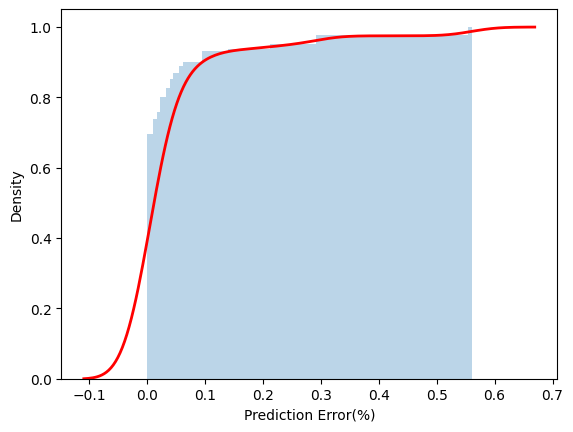

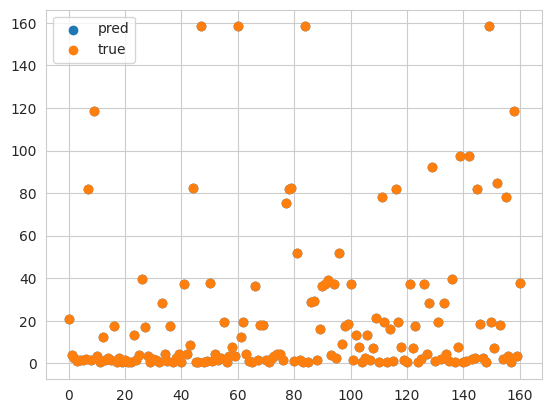

In [5]:
df1 = df[df['io_mode'] == 0]
X = df1[['block_size', 'total_size']]
y = df1['latency']
train_rf(X, y, 0)

(287, 3)


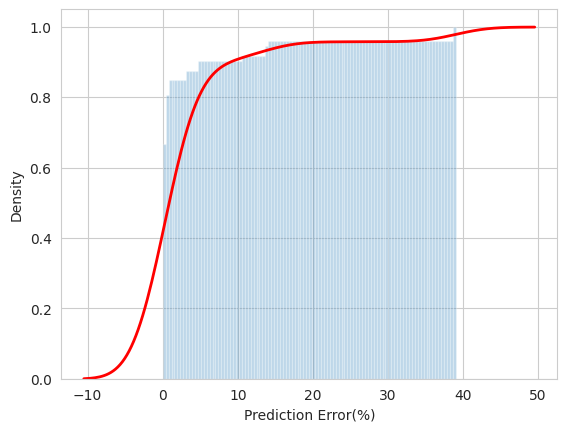

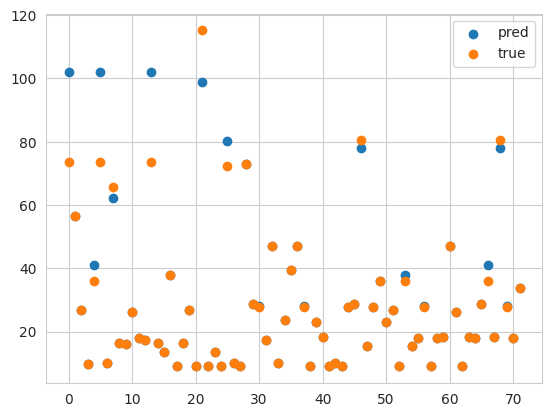

In [6]:
df2 = df[df['io_mode'] == 1]
X = df2[['block_size', 'total_size', 'bandwidth']]
y = df2['latency']
train_rf(X, y, 1)